In [1]:
import numpy as np
import pickle
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list, to_tree, centroid, cut_tree,fcluster
from matplotlib import pyplot as plt
from helper import info, threshold_remove, multirun
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Create a list of removed conformations due to missing residues

In [2]:
threshold_remove(threshold=1, segments= [(143,165)])

Threshold: 1 amount removed: 146


([[[array([[  9.932581, -22.664152, -16.196915]], dtype=float32),
    array([[  8.915028, -19.30223 , -14.556105]], dtype=float32),
    array([[ 11.313942, -19.738045, -11.689028]], dtype=float32),
    array([[ 11.15982 , -16.616524,  -9.48522 ]], dtype=float32),
    array([[  8.208521, -14.887178, -11.17189 ]], dtype=float32),
    array([[  5.6975822, -15.369288 ,  -8.266737 ]], dtype=float32),
    array([[  7.931435 , -13.416527 ,  -5.9093475]], dtype=float32),
    array([[  8.732009, -10.837408,  -8.550835]], dtype=float32),
    array([[  5.0804057, -10.104563 ,  -9.400251 ]], dtype=float32),
    array([[  2.5147917, -11.434275 ,  -6.8081384]], dtype=float32),
    array([[  0.31855488, -14.6537    ,  -7.1198273 ]], dtype=float32),
    array([[ -3.321835, -13.789785,  -7.931199]], dtype=float32),
    array([[ -6.369266, -16.008028,  -7.203903]], dtype=float32),
    array([[ -7.3140416, -15.723498 , -10.8804455]], dtype=float32),
    array([[ -5.067141, -15.57581 , -13.939293]], dtype

In [3]:
with open("chains_list2.var","rb") as chains_list2_var:
   chains_list2 = pickle.load(chains_list2_var)
   chains_list2_var.close()
with open("structures/opened_active.var", "rb") as open_active_var:
    open_active_list = pickle.load(open_active_var)
    open_active_var.close()
with open("structures/closed_inactive.var", "rb") as closed_inactive_var:
    closed_inactive_list = pickle.load(closed_inactive_var)
    closed_inactive_var.close()
with open("structures/opened_inactive.var", "rb") as open_inactive_var:
    open_inactive_list = pickle.load(open_inactive_var)
    open_inactive_var.close()
print(f"open_active: {len(open_active_list)}")
print(f"closed_inactive: {len(closed_inactive_list)}")
print(f"open_inactive: {len(open_inactive_list)}")
annotated_dict_list_codes= {"open_active": open_active_list, "closed_inactive": closed_inactive_list, "open_inactive": open_inactive_list} #dictionary of codes list
annotated_dict_list ={"open_active": list(), "closed_inactive": list(), "open_inactive": list()} #dictionary of list of indices
for i,conformation in enumerate(chains_list2):
    for j,l in enumerate(annotated_dict_list_codes):
        if conformation in annotated_dict_list_codes[l]:
            #print(f"l: {l}")
            annotated_dict_list[l].append(i)
print(f"reduced lengths")
for key in annotated_dict_list:
    print(f"{key}: {len(annotated_dict_list[key])}")
with open("dihedral_mat.var", "rb") as dihedral_mat_var:
   dihedral_mat = (pickle.load(dihedral_mat_var))
   dihedral_mat_var.close()

open_active: 162
closed_inactive: 277
open_inactive: 92
reduced lengths
open_active: 160
closed_inactive: 151
open_inactive: 73


## Run statistics on dihedral based clustering

shape: (385, 2)
type X: <class 'numpy.ndarray'>,  type - ax1[0]: <class 'numpy.float32'> axis1.tolist()[0]: ()


/Users/yao/Desktop/dkp/Work/internship1_bioinfo/helper.py:602: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = linkage(matrix, method = hierarchy_method, metric = dist_metric)


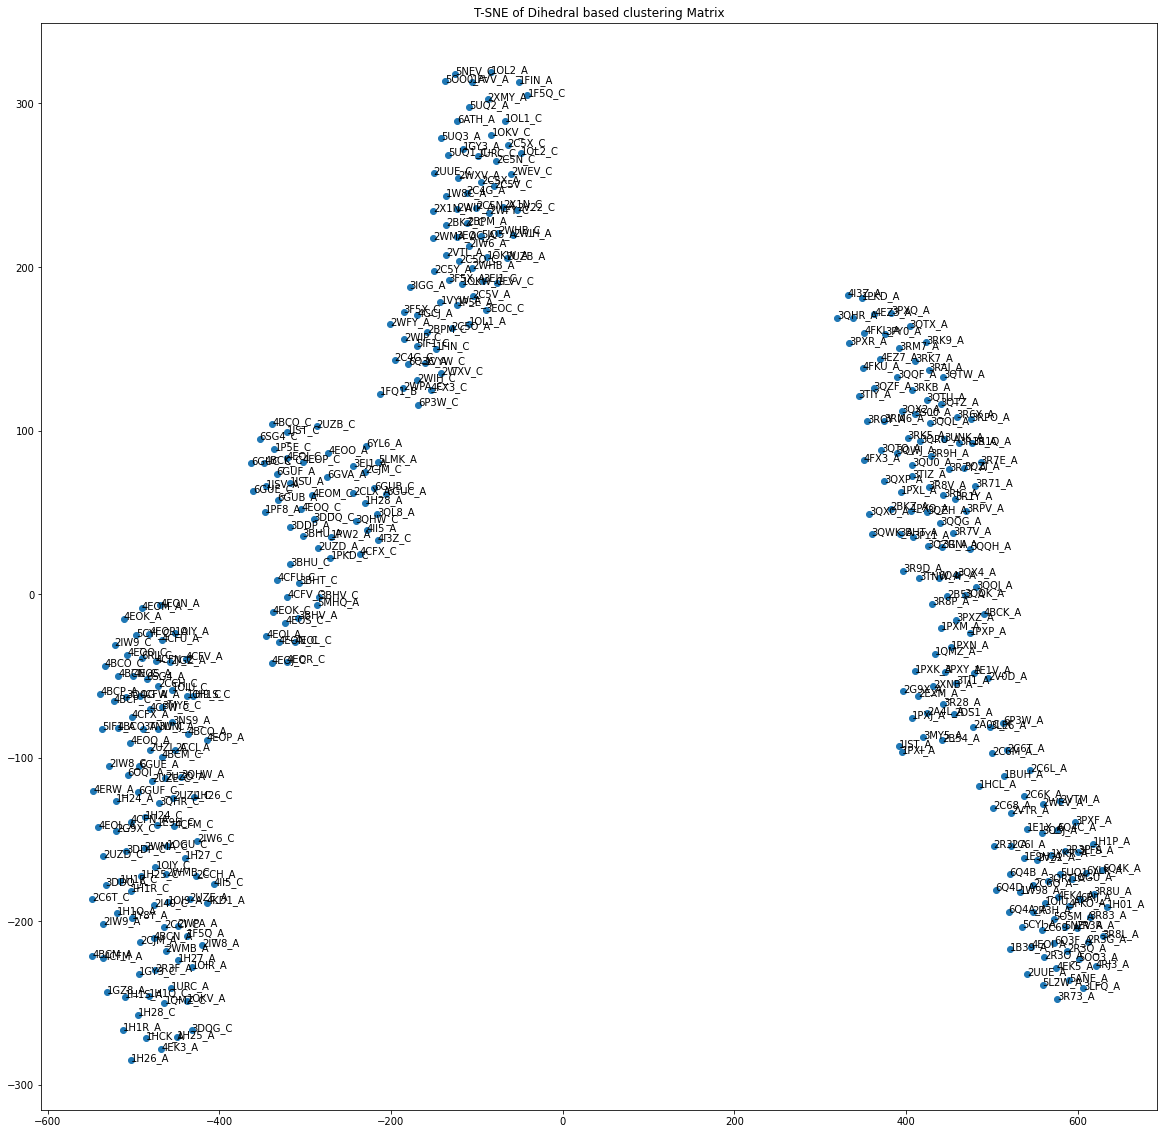

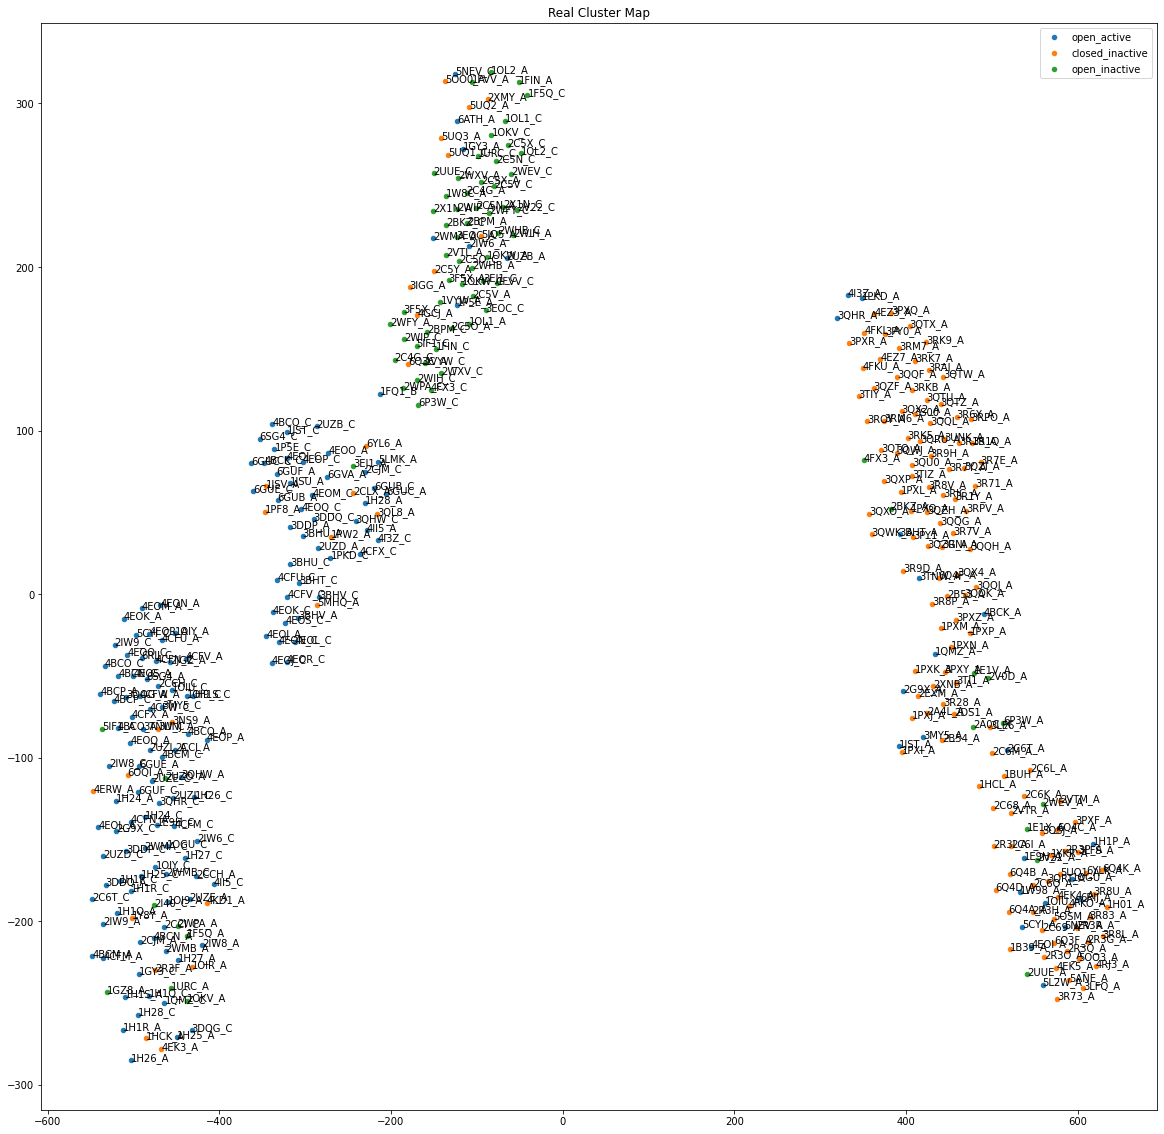

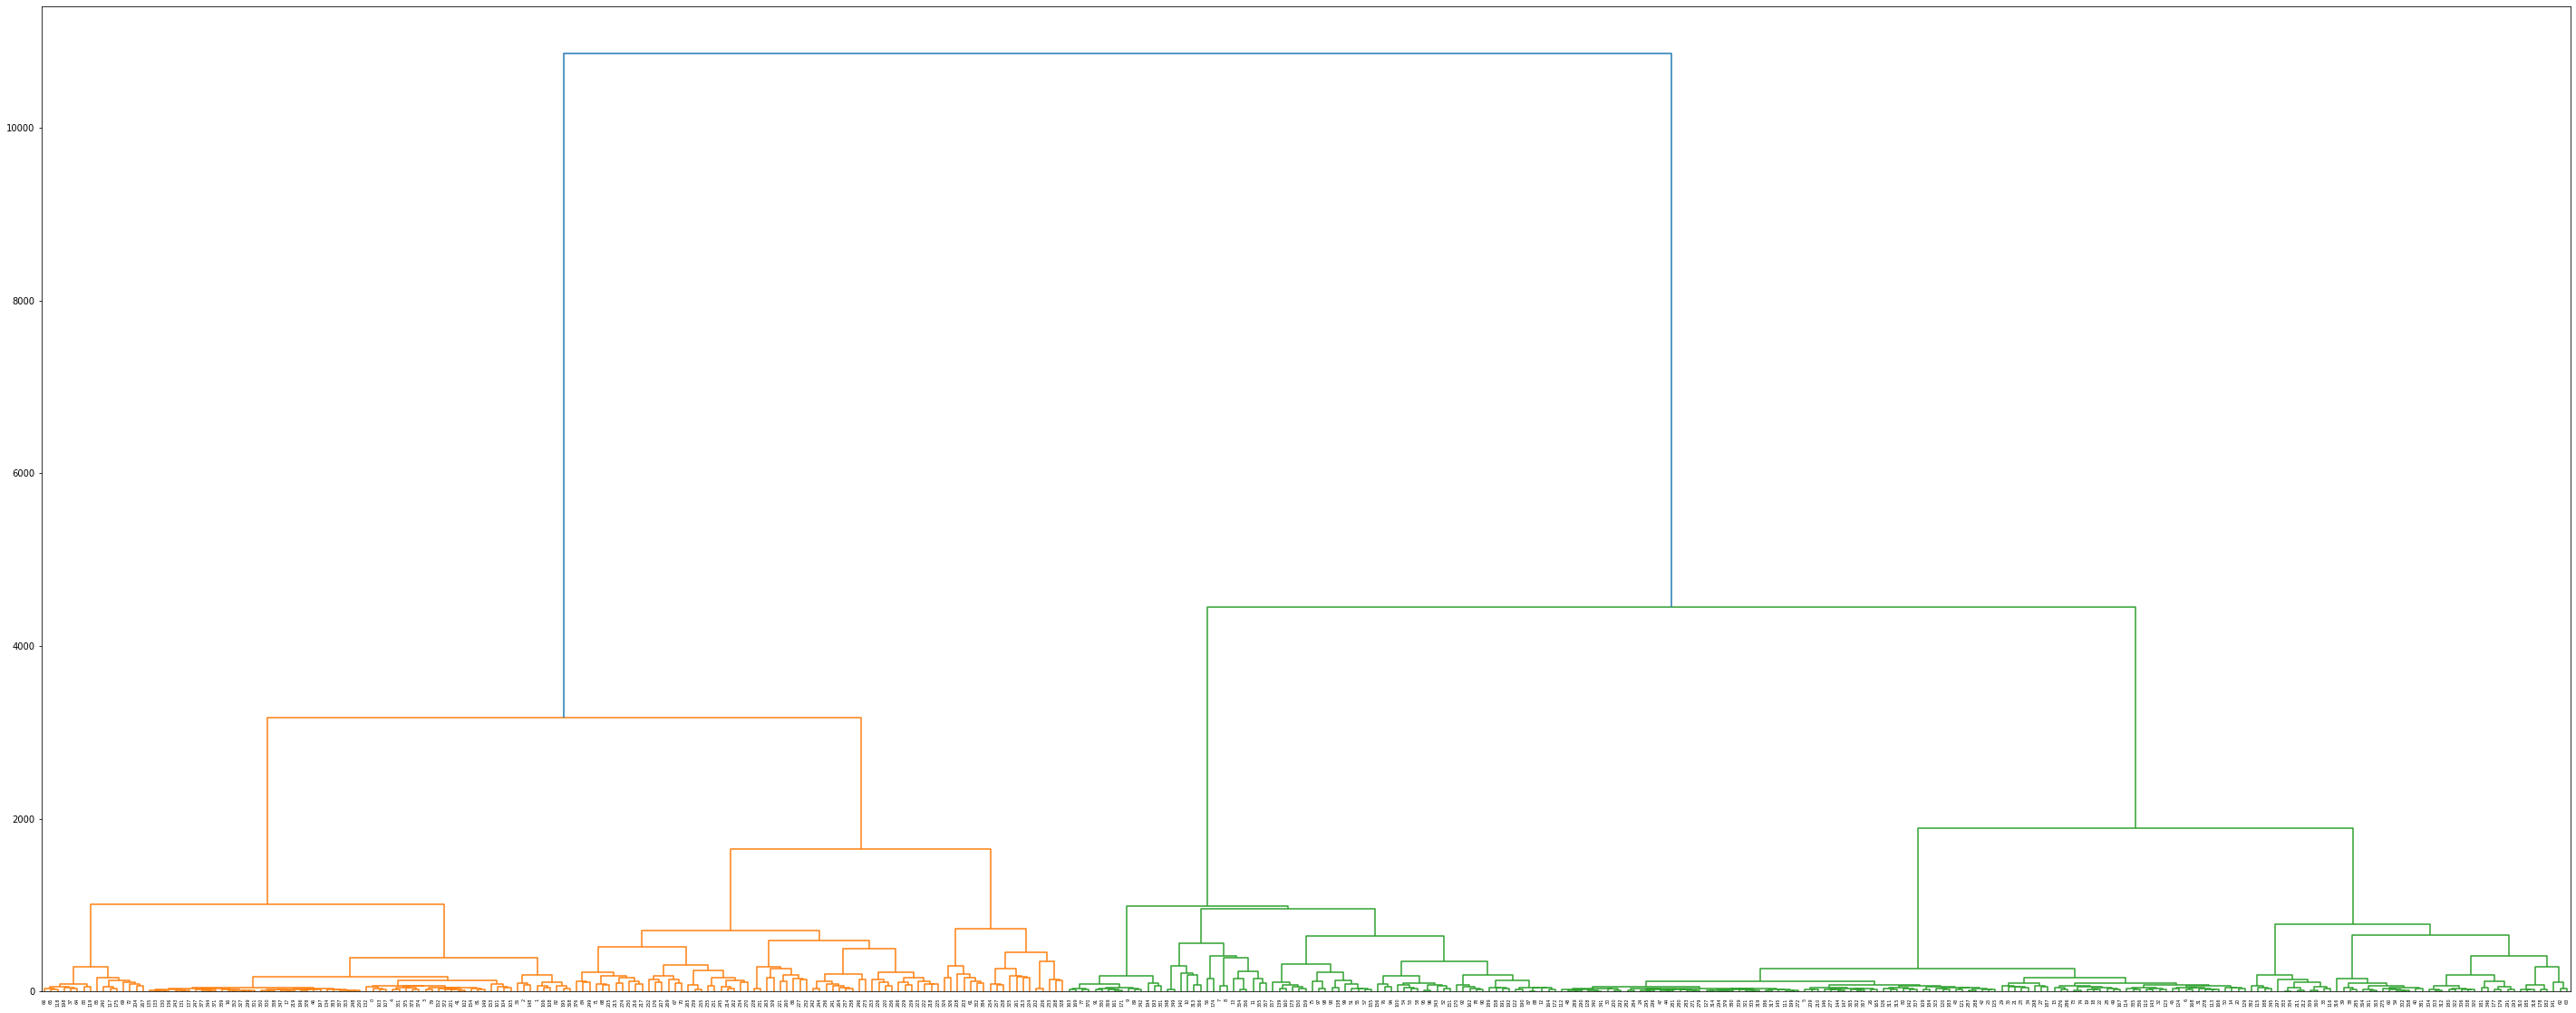

Dendrogram plotted
------------------------------------------------------------
STATISTICS
------------------------------------------------------------
cluster 0, length: 156
cluster 1, length: 154
cluster 2, length: 75
------------------------------------------------------------
MACRO AVERAGES
------------------------------------------------------------
                 Precision    Recall  F1 score
closed_inactive   0.800000  0.821192  0.810458
open_active       0.831169  0.800000  0.815287
open_inactive     0.720000  0.739726  0.729730
Averages          0.783723  0.786973  0.785158
out:
                            Real closed_inactive  Real open_active  Real open_inactive
Predicted closed_inactive                   124                21                  10
Predicted open_active                        17               128                   9
Predicted open_inactive                      10                11                  54
----------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


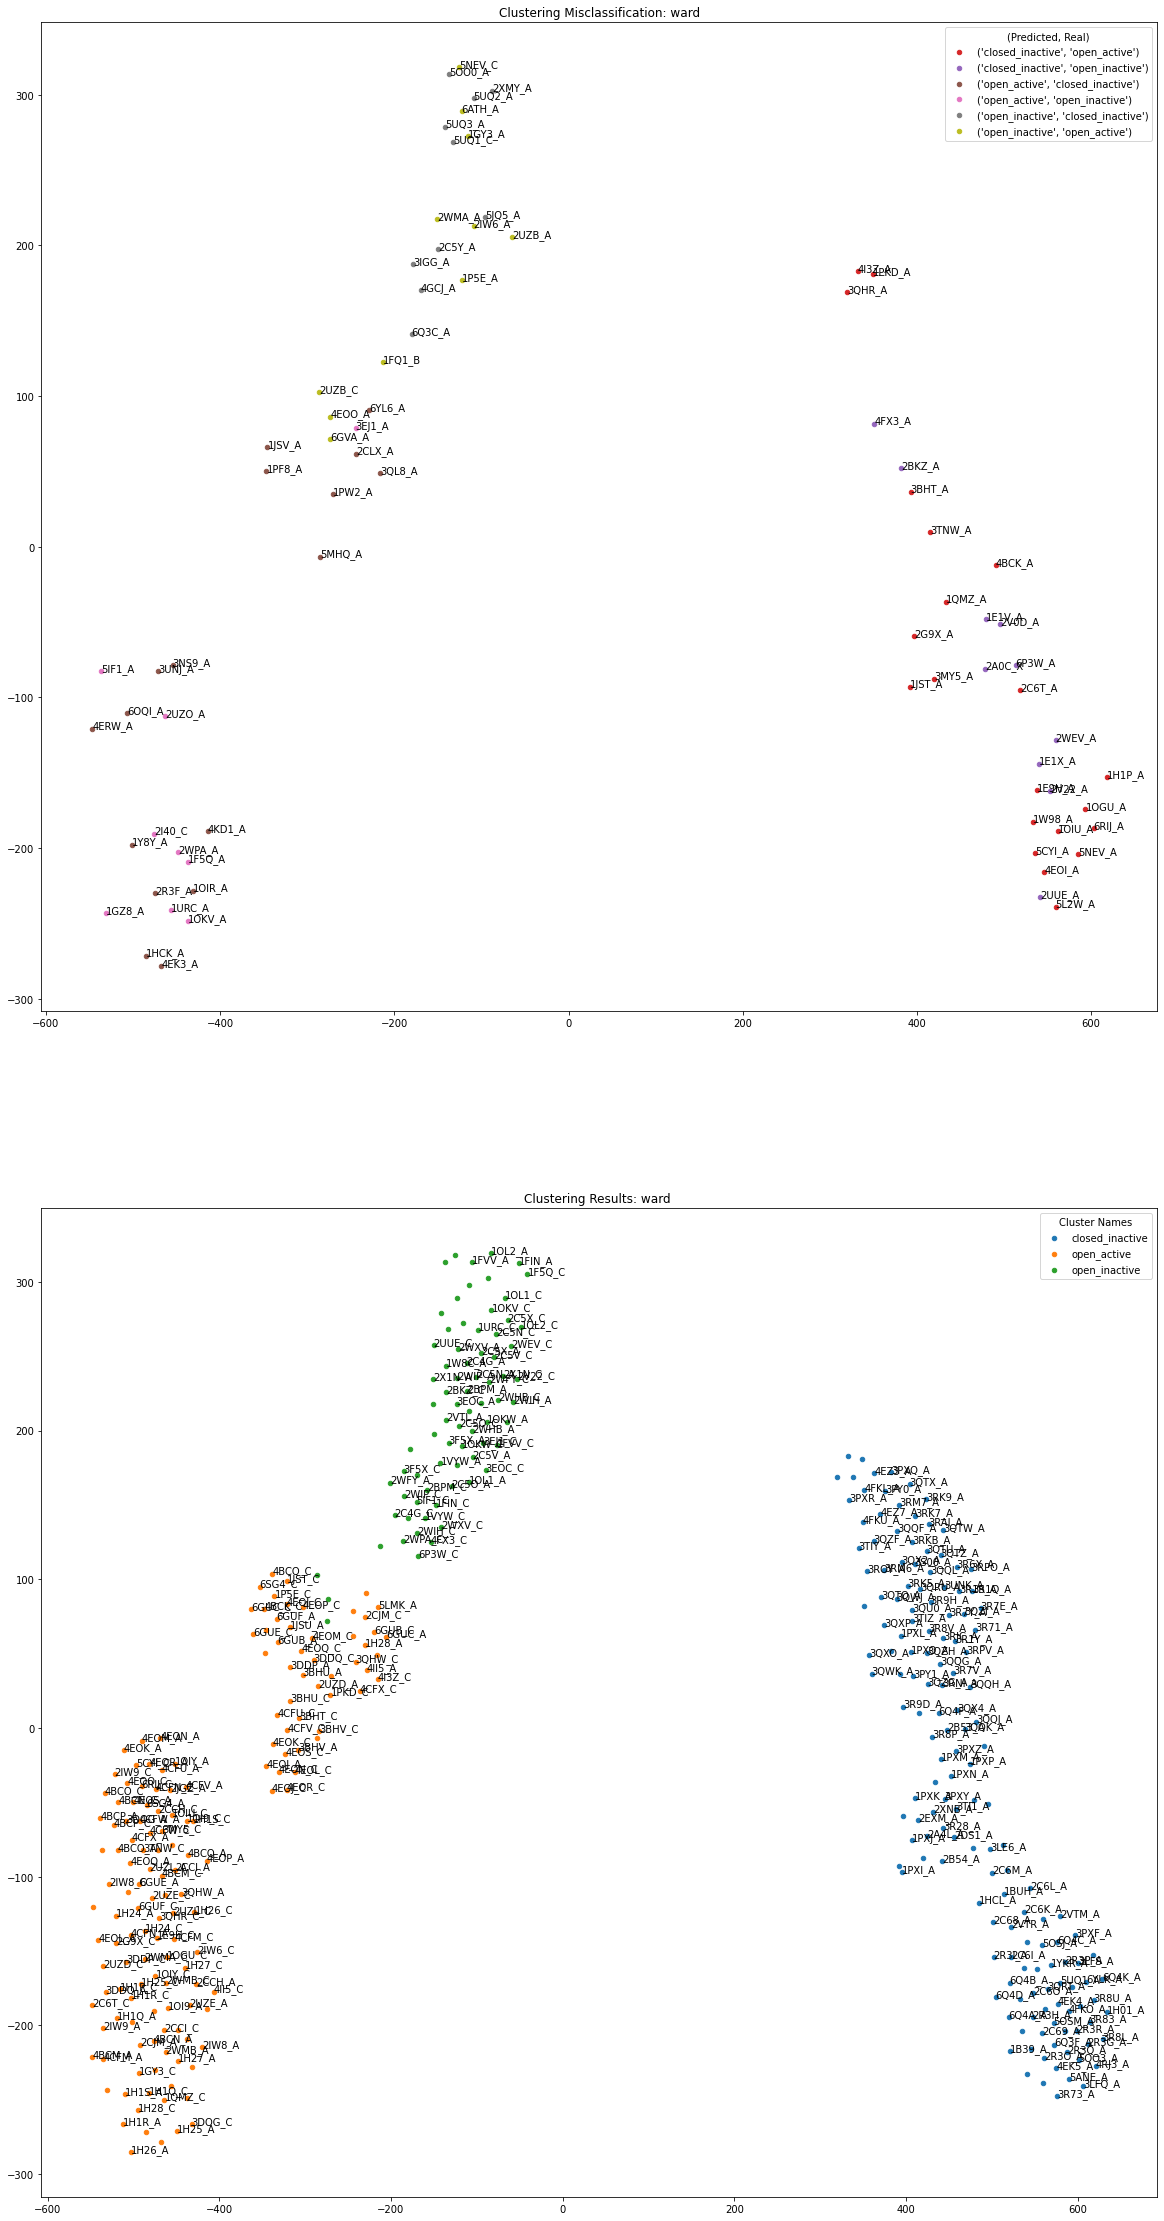

(#missing residues, percentage) [(0, 20.259740259740262)]
miclassified_missing (list where value at i is amount of misclassified and i is amount of missing residues:
 [78]
totals_missing (list where value at i is number of conformations and i is amount of missing residues:
 [385]


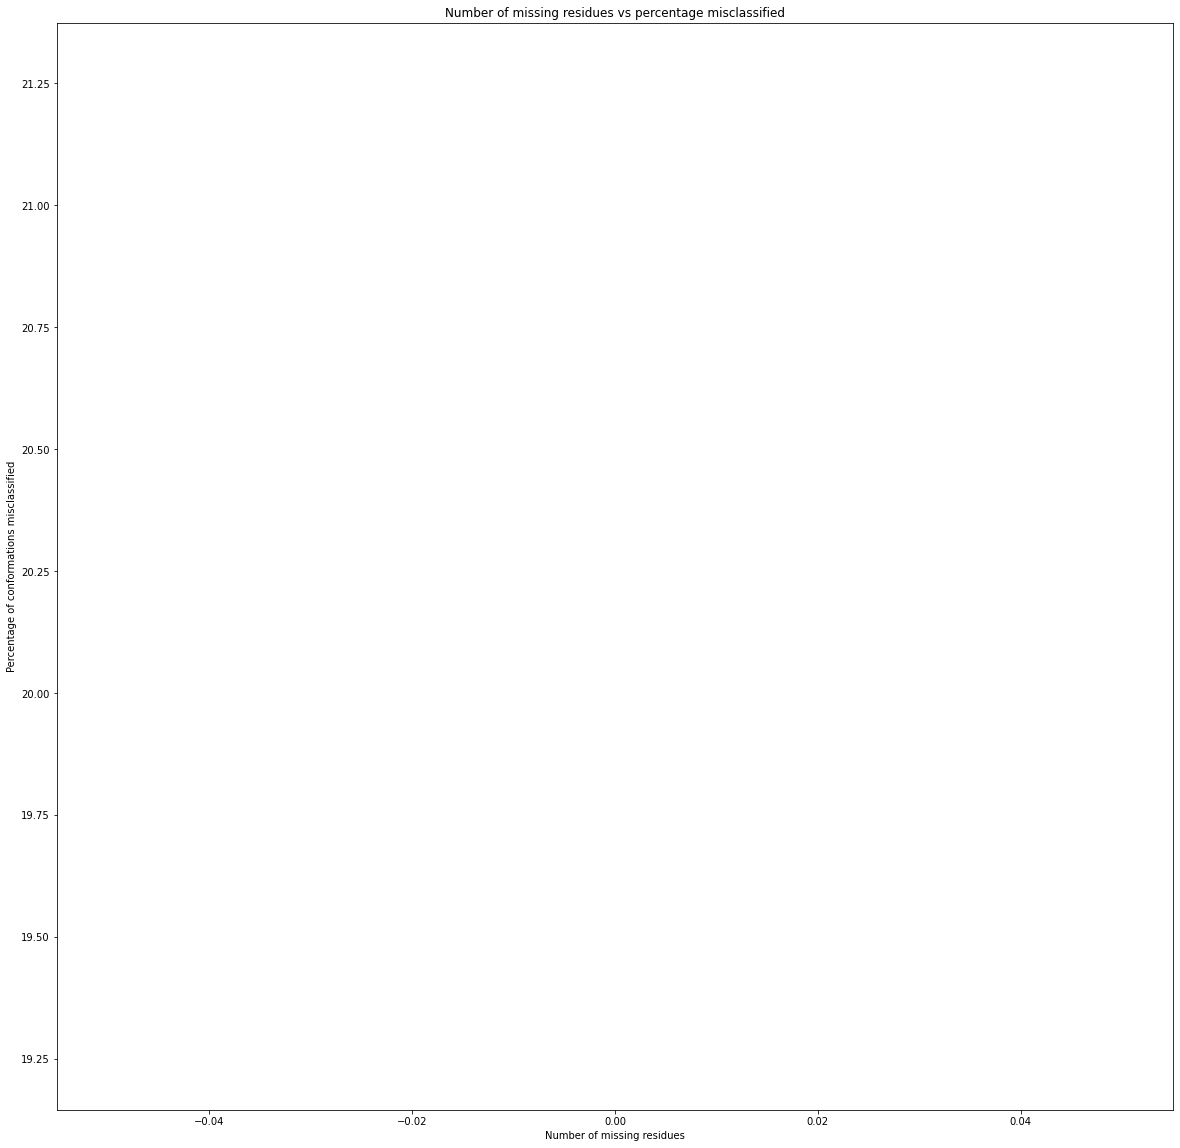

In [4]:
stats_df, cc_df = info(dihedral_mat,"Dihedral based clustering", chains_list2,annotated_dict_list, kernel="linear",hierarchy_method = "ward", no_clusters=3,tsne=True)

In [5]:
print(stats_df.to_latex())
print(cc_df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Precision &    Recall &  F1 score \\
\midrule
closed\_inactive &   0.800000 &  0.821192 &  0.810458 \\
open\_active     &   0.831169 &  0.800000 &  0.815287 \\
open\_inactive   &   0.720000 &  0.739726 &  0.729730 \\
Averages        &   0.783723 &  0.786973 &  0.785158 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Real closed\_inactive &  Real open\_active &  Real open\_inactive \\
\midrule
Predicted closed\_inactive &                   124 &                21 &                  10 \\
Predicted open\_active     &                    17 &               128 &                   9 \\
Predicted open\_inactive   &                    10 &                11 &                  54 \\
\bottomrule
\end{tabular}

